In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from urllib.request import urlopen
from bs4 import BeautifulSoup

In [185]:
url = "http://www.hubertiming.com/results/2017GPTR10k"
html = urlopen(url)

In [186]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [187]:
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [188]:
text = soup.get_text()
# print(soup.text)

In [189]:
# soup.find_all('a')
all_links = soup.find_all("a")
for link in all_links:
  print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [190]:
rows = soup.find_all('tr')
# print(rows[:10])

In [191]:
for row in rows:
  row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [192]:
str_cells = str(row_td)
clean_text = BeautifulSoup(str_cells, "lxml").get_text()
print(clean_text)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


In [193]:
import re

list_rows = []
for row in rows:
  cells = row.find_all('td')
  str_cells = str(cells)
  clean = re.compile('<.*?>|[\r|\n]|(\s{2,})') # removing escape characters!!!
  clean2 = (re.sub(clean, '', str_cells))
  list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, LIBBY B MITCHELL, F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


str

In [194]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, JARED WILSON, M, TIGARD, OR, 36:21, 3..."
6,"[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ..."
7,"[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 37:4..."
8,"[4, 623, PAUL MORROW, M, BEAVERTON, OR, 38:34,..."
9,"[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 39..."


In [195]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F]
7,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F]


In [196]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F]


In [197]:
col_labels = soup.find_all('th')

In [198]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, 'lxml').get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Time, Gun Time, Team]']


In [199]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Time, ..."


In [200]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]


In [201]:
frames = [df3, df1]
df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]


In [202]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


In [203]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     583 non-null    object
 1    Bib       581 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(583, 9)

In [204]:
df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     578 non-null    object
 1    Bib       578 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.2+ KB


(578, 9)

In [205]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F]


In [206]:
df7.rename(columns={'[Place':'Place'}, inplace=True)
df7.rename(columns={' Team]':'Team'}, inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F]


In [207]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head(10)

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F
10,6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,39:55,
11,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,40:04,40:17,
12,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,40:05,40:09,
13,9,7,BRANDON THOMAS,M,,,40:17,40:24,COLUMBIA TEAM B
14,10,3,ERIK BJORNSTAD,M,,,40:21,40:25,COLUMBIA TEAM A


In [231]:
time_list = df7[' Gun Time'].tolist()

time_mins = []

for i in time_list:
  k = i.split(':')
  if len(k) == 2:
    m,s = k
    math = (int(m) * 60 + int(s))/60
  else:
    h,m,s = k
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
  time_mins.append(math)

print(time_mins)

[36.4, 36.75, 37.8, 38.61666666666667, 39.4, 39.916666666666664, 40.28333333333333, 40.15, 40.4, 40.416666666666664, 40.666666666666664, 40.7, 40.833333333333336, 41.21666666666667, 41.4, 41.81666666666667, 42.03333333333333, 42.46666666666667, 42.56666666666667, 42.8, 42.86666666666667, 42.96666666666667, 43.06666666666667, 43.6, 43.5, 43.71666666666667, 44.016666666666666, 43.86666666666667, 43.85, 43.88333333333333, 43.86666666666667, 43.86666666666667, 44.166666666666664, 44.2, 44.3, 44.28333333333333, 44.483333333333334, 45.15, 45.166666666666664, 44.766666666666666, 45.016666666666666, 45.766666666666666, 45.15, 45.36666666666667, 45.5, 45.3, 45.583333333333336, 45.53333333333333, 45.43333333333333, 45.4, 45.88333333333333, 45.56666666666667, 45.7, 46.516666666666666, 46.28333333333333, 45.983333333333334, 46.03333333333333, 45.95, 46.083333333333336, 46.11666666666667, 46.266666666666666, 46.65, 46.46666666666667, 46.55, 46.96666666666667, 48.016666666666666, 47.03333333333333, 

In [218]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,,36.400000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F,36.750000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,,37.800000
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,,38.616667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F,39.400000


([<matplotlib.axis.XTick at 0x7825eca56050>], [Text(1, 0, 'Runners')])

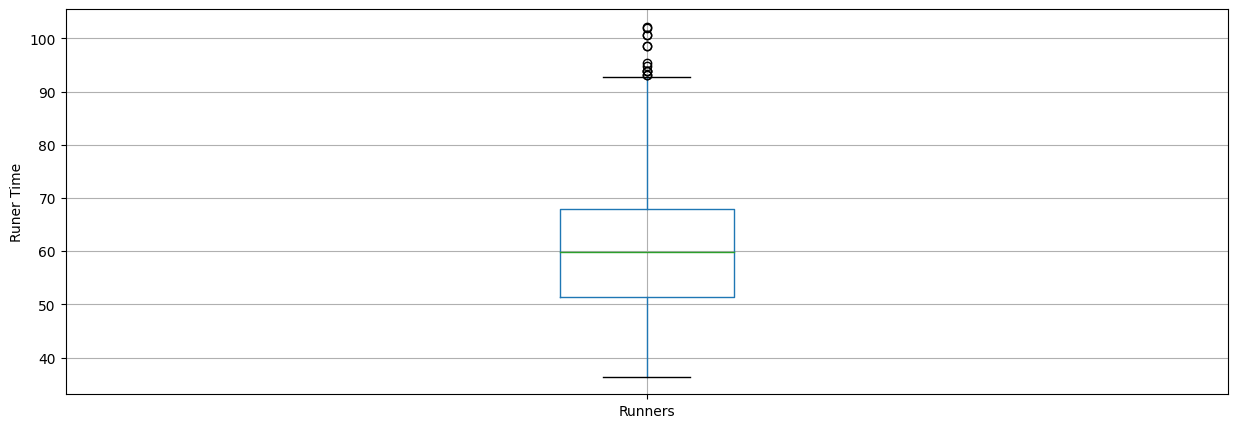

In [220]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Runer Time')
plt.xticks([1], ['Runners'])

<ipython-input-228-69d9daa153b8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})


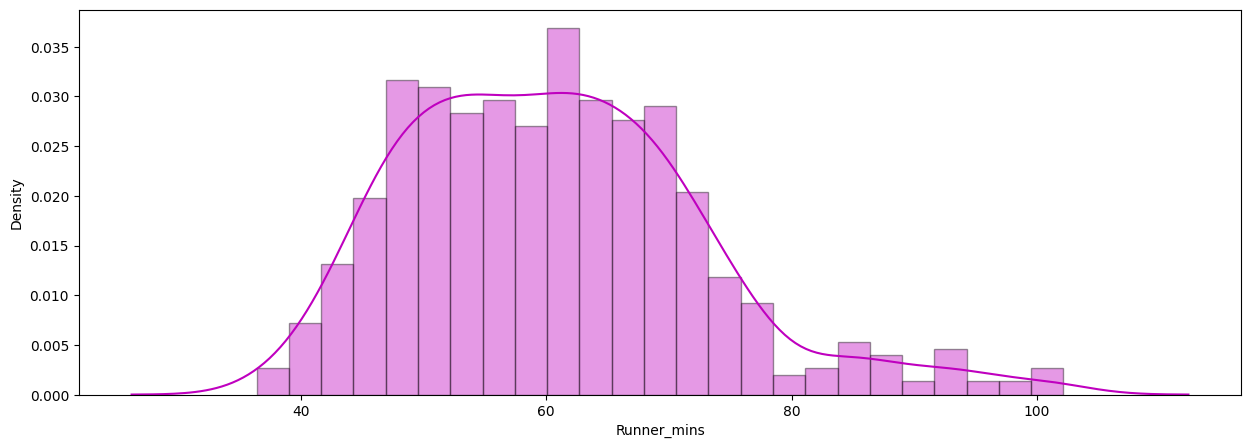

In [228]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

<ipython-input-234-21ddcc5733da>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
<ipython-input-234-21ddcc5733da>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(m_fuko, hist=True, kde=True, rug=False, hist

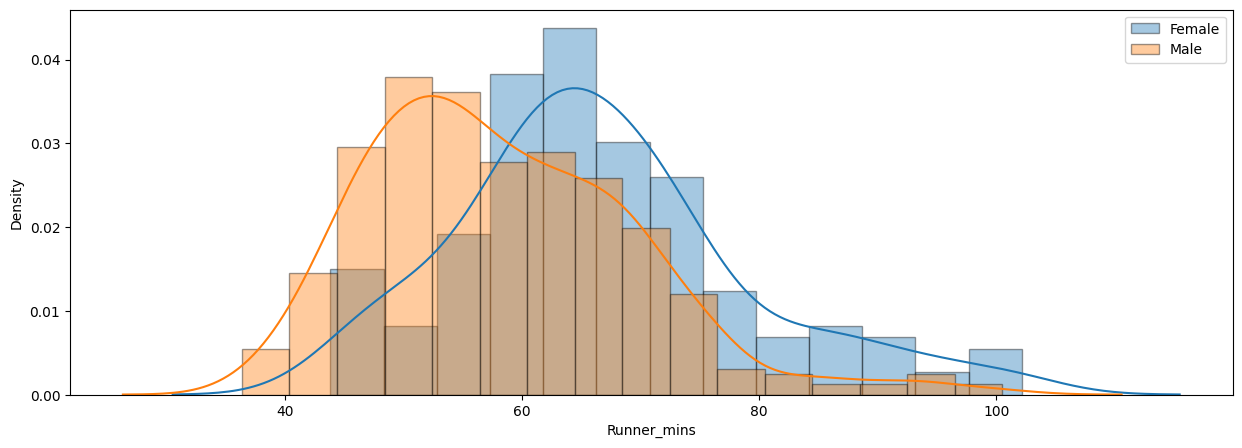

In [234]:
f_fuko = df7.loc[df7[' Gender'] == ' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender'] == ' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [235]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                      \
              count       mean        std        min        25%     50%   
 Gender                                                                   
 F            163.0  66.743252  12.287397  43.866667  59.283333  65.200   
 M            414.0  58.224960  11.170953  36.400000  49.787500  56.475   

                                
               75%         max  
 Gender                         
 F       72.358333  102.166667  
 M       65.429167  100.533333  


Text(0.5, 0.98, '')

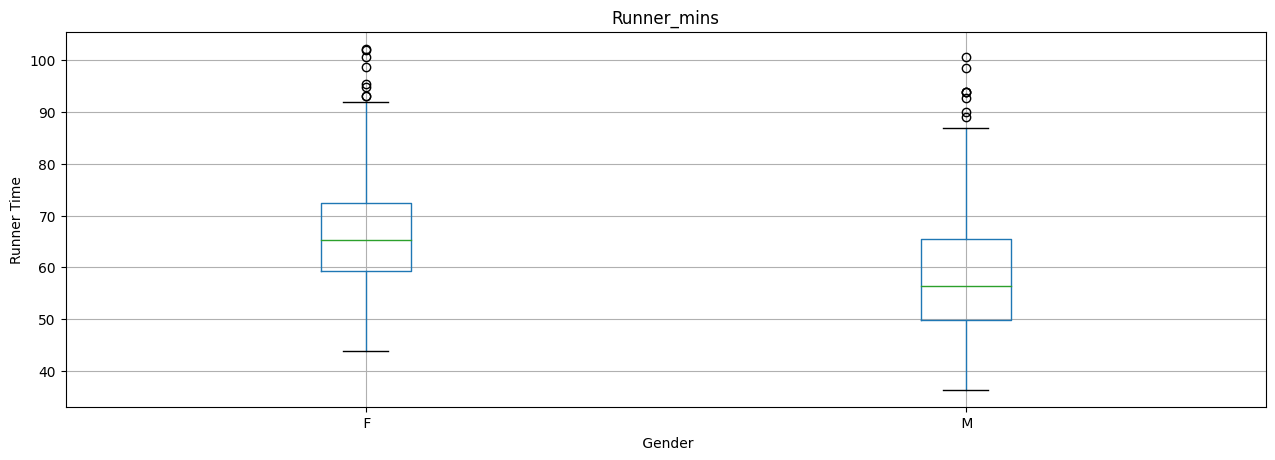

In [237]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Runner Time')
plt.suptitle("")